In [1]:
# Use Python 3.6, networkx 1.11
# Necessary...
import csv # to read CSV file
import networkx as nx # to make and analyze networks/graphs
import unicodedata # to compare strings while ignoring case
import matplotlib.pyplot as plt # to draw figures
from matplotlib.pyplot import figure # to draw figures
from tabulate import tabulate # to display markdown-compatible tables
import operator # to make sorting easier, using .itemgetter

# Function to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Set the name of the project, to use as prefix on names of all output files.
## Project: UN Glossary of World Heritage Terms
# analysis_project_name = "UN_GWHT_TDN" 
# analysis_project_data_file = "ilang_UN_GWHT_terminology_raw - Sheet1.csv"
## Project: Smart Retail Network
analysis_project_name = "SRN_TDN" 
analysis_project_data_file = "ilang_SRN_terminology - Sheet1.csv"

In [3]:
# Get raw definitions from a CSV file
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open(analysis_project_data_file) as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [4]:
# Language as Network
# Create an empry term dependencies network, to hold dependencies of definitions on terms.
term_dependency_network = []
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

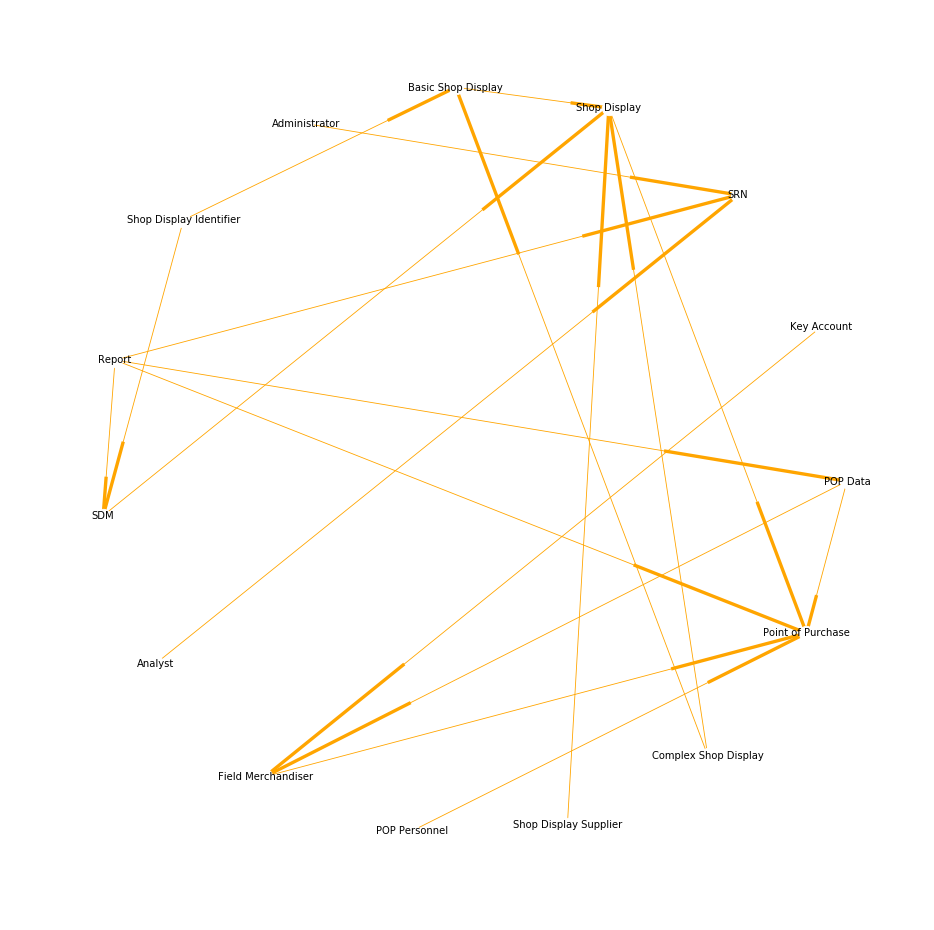

In [5]:
# Create a networkx graph to hold the term dependency network
tdn_graph = nx.DiGraph()
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')
    
# Plot the graph showing the term dependency network.
figure(num=None, figsize=(10, 10), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(tdn_graph, k=20)
nx.draw(tdn_graph, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_graph.png" % (analysis_project_name)
plt.savefig(image_file_name)

In [6]:
# Evaluate Term Importance
# Compute and show term importance, as count of edges entering that node (in degree)
nx.set_node_attributes(tdn_graph, values = tdn_graph.in_degree(), name = 'In degree')
in_degrees_data = list(nx.get_node_attributes(tdn_graph, 'In degree').items())
in_degrees_data.sort(key = operator.itemgetter(1), reverse=True)

# Print output to text file.
output_file_name = "%s_Term_Importance.txt" % analysis_project_name
with open(output_file_name, "w") as text_file:
    print(tabulate(in_degrees_data, headers = ['Term', 'Used in'], tablefmt="pipe"), file=text_file)

In [7]:
# Evaluate Term Sensitivity to Change
# Compute and show term sensitivity to change, as count of edges exiting that node (out degree)
nx.set_node_attributes(tdn_graph, values = tdn_graph.out_degree(), name = 'Out degree')
out_degrees_data = list(nx.get_node_attributes(tdn_graph, 'Out degree').items())
out_degrees_data.sort(key = operator.itemgetter(1), reverse=True)

# Print output to text file.
output_file_name = "%s_Term_Change_Sensitivity.txt" % analysis_project_name
with open(output_file_name, "w") as text_file:
    print(tabulate(out_degrees_data, headers = ['Term', 'Uses'], tablefmt="pipe"), file=text_file)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

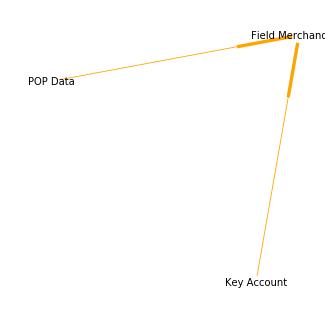

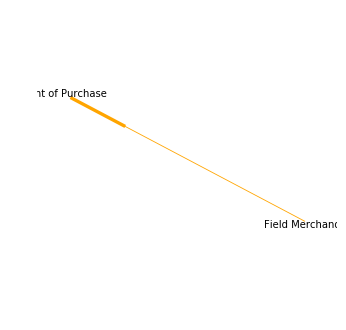

In [8]:
# Importance and Change Sensitivity Together
# Pick a single term to evaluate importance and change sensitivity of.
given_term = 'Field Merchandiser'

# STIN: Single Term Importance Network
# Build STIN, Single Term Importance Network, that includes only all edges which end in the given term.
stin = nx.DiGraph()
for i in tdn_graph.edges():
    if given_term == i[1]:
        stin.add_edge(i[0], i[1])

# Display STIN as markdown-compatible table
from tabulate import tabulate
stin_rows = []
for i in stin.edges():
    stin_rows.append((i[0], i[1]))

# Print output to text file.
output_file_name = "%s_%s_STIN.txt" % (analysis_project_name,given_term.replace(" ","_"))
with open(output_file_name, "w") as text_file:
    print(given_term, "is used in", len(stin_rows), "terms.", file=text_file)
    print(tabulate(stin_rows, headers = ['Term', 'Uses'], tablefmt="pipe"), file=text_file)

# Draw STIN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(stin, k=20)
nx.draw(stin, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_STIN.png" % given_term.replace(" ","_")
plt.savefig(image_file_name)

# TCSN: Term Change Sensitivity Network
# Build TCSN, Term Change Sensitivity Network, that includes only all edges which start in the given term.
tcsn = nx.DiGraph()
for i in tdn_graph.edges():
    if given_term == i[0]:
        tcsn.add_edge(i[0], i[1])

# Display TCSN as markdown-compatible table
from tabulate import tabulate
tcsn_rows = []
for i in tcsn.edges():
    tcsn_rows.append((i[0], i[1]))

# Print output to text file.
output_file_name = "%s_%s_TCSN.txt" % (analysis_project_name,given_term.replace(" ","_"))
with open(output_file_name, "w") as text_file:
    print(given_term, "uses", len(tcsn_rows), "terms.", file=text_file)
    print(tabulate(tcsn_rows, headers = ['Term', 'Uses'], tablefmt="pipe"), file=text_file)

# Draw TCSN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(tcsn, k=20)
nx.draw(tcsn, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_TCSN.png" % given_term.replace(" ","_")
plt.savefig(image_file_name)

In [9]:
# Blowing Definitions Up
# Count words in all definitions, after defining stopwords, and cleaning up (remove punctuation and some other characters).
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
wordcount = {}
for i in raw_definitions:
    for word in i['definiens'].lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        word = word.replace("(","")
        word = word.replace(")","")
        word = word.replace("/","")
        word = word.replace("-","")
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

# Make a list of words, and for each its count in all definiens.
sortable_wordcount = list(wordcount.items())
sortable_wordcount.sort(key = operator.itemgetter(1), reverse=True)

# Take only words which appear more than a threshold number of times.
high_wordcount = []
high_wordcount_threshold = 1
for i in sortable_wordcount:
    if i[1] > high_wordcount_threshold:
        high_wordcount.append(i)

# Print output to text file.
output_file_name = "%s_Blow_Up_High_Word_Count.txt" % (analysis_project_name)
with open(output_file_name, "w") as text_file:
    print(tabulate(high_wordcount, headers = ['External Term', 'Count'], tablefmt="pipe"), file=text_file)

In [11]:
# Blowing Definitions Up (contd.)
# Filter the high wordcount list, to remove all words which appear in all defined terms (i.e., definiendum).
definiendum_words = []
for i in raw_definitions:
    definiendum_words = definiendum_words + i['definiendum'].lower().split()
    definiendum_words = definiendum_words + i['short definiendum'].lower().split()
filtered_high_wordcount = []
removed_from_high_wordcount = []
for i in high_wordcount:
    if i[0] not in definiendum_words:
        filtered_high_wordcount.append(i)
    if i[0] in definiendum_words:
        removed_from_high_wordcount.append(i)

# Print a table of filtered high count words.
output_file_name = "%s_Blow_Up_Filtered_High_Word_Count.txt" % (analysis_project_name)
with open(output_file_name, "w") as text_file:
    print(tabulate(filtered_high_wordcount, headers = ['External Term', 'Count'], tablefmt="pipe"), file=text_file)

# Print a table of high word count words, removed by filter above.
output_file_name = "%s_Blow_Up_Removed_High_Word_Count.txt" % (analysis_project_name)
with open(output_file_name, "w") as text_file:
    print(tabulate(removed_from_high_wordcount, headers = ['Removed External Term', 'Count'], tablefmt="pipe"), file=text_file)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

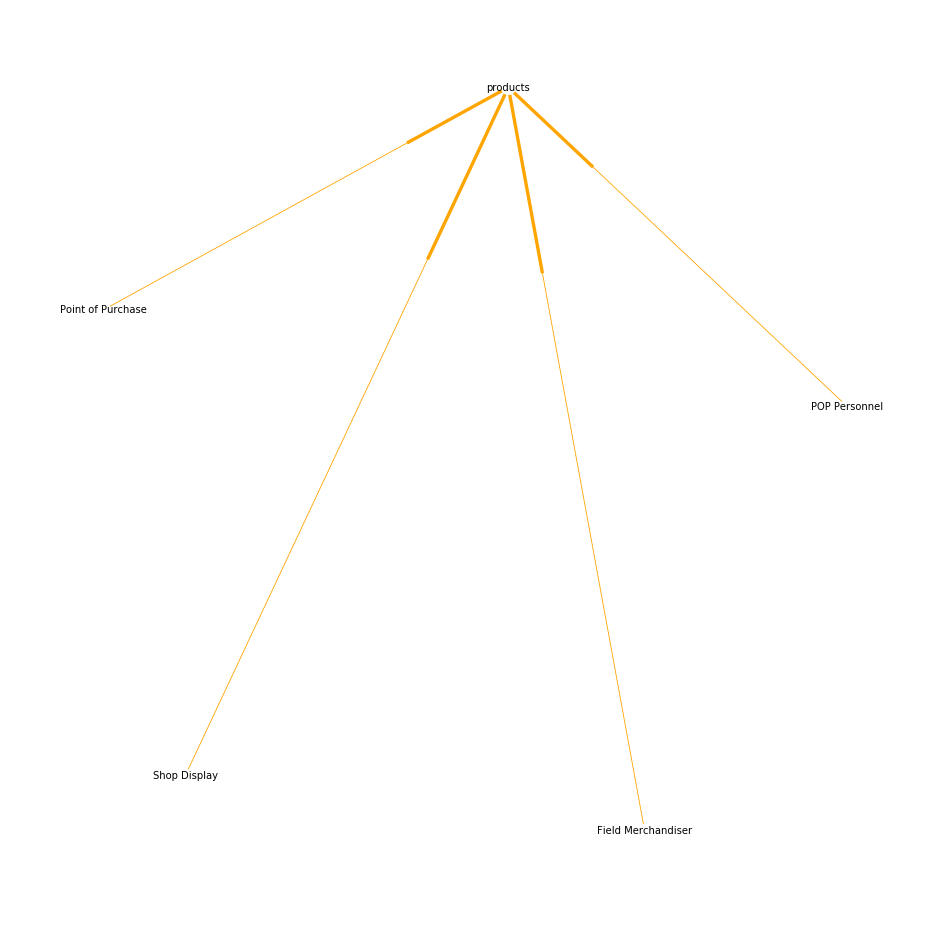

In [19]:
# Blowing Definitions Up (contd.)
# Select an external term, build a graph which includes only all edges from internal terms to that external term. 
external_term = 'products'
xtdn = nx.DiGraph()
for i in raw_definitions:
    if external_term in i['definiens']:
        xtdn.add_edge(i['definiendum'], external_term, label = 'depends')

# Print a table of all internal terms which use the given external term.
output_file_name = "%s_%s_XTDN_edges.txt" % (analysis_project_name, external_term)
with open(output_file_name, "w") as text_file:
    print(tabulate(xtdn.edges(), headers = ['Internal Term', 'External Term'], tablefmt="pipe"), file=text_file)
    
# Plot the graph showing the given external term and all internal terms that depend on it.
figure(num=None, figsize=(10, 10), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(xtdn, k=20)
nx.draw(xtdn, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_%s_XTDN_graph.png" % (analysis_project_name, external_term)
plt.savefig(image_file_name)

In [15]:
nx.set_node_attributes(tdn_graph, values = tdn_graph.in_degree(), name = 'In degree')
in_degrees_data = list(nx.get_node_attributes(tdn_graph, 'In degree').items())
in_degrees_data.sort(key = operator.itemgetter(1), reverse=True)

TypeError: object of type 'generator' has no len()

In [133]:
internal_terms = dict()
external_terms = dict()
internal_dependency_edges = dict()
external_dependency_edges = dict()

internal_term_node_color = '#CC8400'
external_term_node_color = '#0048CC'

internal_dependency_edge_color = '#FFA500'
external_dependency_edge_color = '#005AFF'

internal_terms = [list(('Internal Term', i, internal_term_node_color)) for i in list(tdn_graph.nodes()) ]
external_terms = [list(('External Term', i, external_term_node_color)) for i, v in filtered_high_wordcount]

internal_dependency_edges = [list((o, d, internal_dependency_edge_color)) for o, d in tdn_graph.edges()]


# print("Internal terms:", internal_terms)
# print(type(internal_terms[0]))
# internal_terms[0]
# print("External terms:", external_terms)
# print(type(external_terms[0]))
# external_terms[0]
print("Internal dependency edges:", internal_dependency_edges)
print(type(internal_dependency_edges[0]))
internal_dependency_edges[0]

Internal dependency edges: [['Report', 'SRN', '#FFA500'], ['Report', 'SDM', '#FFA500'], ['Report', 'Point of Purchase', '#FFA500'], ['Report', 'POP Data', '#FFA500'], ['Analyst', 'SRN', '#FFA500'], ['Administrator', 'SRN', '#FFA500'], ['Shop Display Identifier', 'SDM', '#FFA500'], ['Shop Display Identifier', 'Basic Shop Display', '#FFA500'], ['SDM', 'Shop Display', '#FFA500'], ['Shop Display', 'Shop Display', '#FFA500'], ['Shop Display', 'Point of Purchase', '#FFA500'], ['Basic Shop Display', 'Shop Display', '#FFA500'], ['Complex Shop Display', 'Shop Display', '#FFA500'], ['Complex Shop Display', 'Basic Shop Display', '#FFA500'], ['Shop Display Supplier', 'Shop Display', '#FFA500'], ['Field Merchandiser', 'Point of Purchase', '#FFA500'], ['Field Merchandiser', 'Field Merchandiser', '#FFA500'], ['POP Personnel', 'Point of Purchase', '#FFA500'], ['POP Data', 'Point of Purchase', '#FFA500'], ['POP Data', 'Field Merchandiser', '#FFA500'], ['Key Account', 'Field Merchandiser', '#FFA500']]
<

['Report', 'SRN', '#FFA500']

In [44]:
internal_terms = []
external_terms = []

for i, v in filtered_high_wordcount:
    external_terms.append(i)

# Create a Blown Up Term Dependency Network graph, bu_tdn.
bu_tdn = nx.DiGraph()

## Setup nodes in bu_tdn

# Add a node for each External Term in filtered_high_wordcount.
for i, v in filtered_high_wordcount:
    bu_tdn.add_node(i)

# Add use counts, form filtered_high_wordcount, to each External Term node.
nx.set_node_attributes(bu_tdn, values = dict(filtered_high_wordcount), name = 'Use count')

# Add a node for each Internal Term.
bu_tdn.add_nodes_from(tdn_graph.nodes())



## Edges


In [45]:
nx.get_node_attributes(bu_tdn, 'Use count')

{'andor': 2,
 'displays': 2,
 'employee': 2,
 'generated': 2,
 'individual': 3,
 'interested': 2,
 'presentation': 2,
 'products': 3,
 'software': 2,
 'sold': 2,
 'used': 2,
 'visiting': 2}

In [47]:
bu_tdn.add_nodes_from(tdn_graph.nodes())

In [48]:
print(bu_tdn.nodes())

['products', 'individual', 'software', 'used', 'displays', 'generated', 'sold', 'visiting', 'andor', 'presentation', 'employee', 'interested', 'Report', 'SRN', 'Analyst', 'Administrator', 'Shop Display Identifier', 'SDM', 'Shop Display', 'Basic Shop Display', 'Complex Shop Display', 'Shop Display Supplier', 'Point of Purchase', 'Field Merchandiser', 'POP Personnel', 'POP Data', 'Key Account']


In [49]:
filtered_high_wordcount

('individual', 3)